The Ground state of the time-independent $Schr\ddot{o}dinger$ $equation$ $1D$

Variational Physical Informed Neural Network is used for training.

In [ ]:
# load important packages
import os
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import layers
from datetime import datetime
tf.random.set_seed(1)
import random
random.seed(1)
np.random.seed(1)

from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import losses
import scipy
from scipy import integrate


2.3.1


In [ ]:
## obtain Gauss quadrature points
global nx
nx = 1024

# domain [a, b]
a = -6
b = 6
# generate Gaussian quadrature points on [-1, 1]
[x1, w] = tf.constant(scipy.special.roots_legendre(nx))

####### Gaussian quadrature points on [a, b]
x = 0.5*(x1 + 1)*(b - a) + a
# gauss = sum(w * f(x)) * 0.5*(b - a)
x = tf.reshape(x, [nx,] )
w = tf.reshape(w, [nx,] )
x = tf.cast(x, dtype='float32')
w = tf.cast(w, dtype='float32')


In [ ]:
## load data
import scipy as scipy
import scipy.io as sio

mat_1 = sio.loadmat('exp_pot1D_data.mat')
pot_exp_d = mat_1['Vi']
U0_exp_d = mat_1['U1']
EV_exp = mat_1['Di']
EV_exp = EV_exp[:, 0]
len_d = len(pot_exp_d)
A_exp = mat_1['Aexp'].reshape(len_d,1)
c_exp = mat_1['c'].reshape(len_d,1)
k_exp = mat_1['k'].reshape(len_d,1)
#######################

mat3 = sio.loadmat('komb_pot1D_data.mat')
pot_comb_d = mat3['Vi']
U0_comb_d = mat3['U1']
EV_comb = mat3['Di']
EV_comb = EV_comb[:, 0]
A1_comb = mat3['A1'].reshape(len_d,1)
A2_comb = mat3['A2'].reshape(len_d,1)
c1_comb = mat3['c1'].reshape(len_d,1)
c2_comb = mat3['c2'].reshape(len_d,1)
cfw_comb = mat3['cfw'].reshape(len_d,1)
h_comb = mat3['h'].reshape(len_d,1)
k1_comb = mat3['k1'].reshape(len_d,1)
k2_comb = mat3['k2'].reshape(len_d,1)
l_comb = mat3['l'].reshape(len_d,1)

nodes = len(pot_exp_d[0])
print("Total number of examples", len_d)
print("Number of nodes:",nodes)
x_d = mat_1['xi'].reshape(nodes,1)
x_d = tf.cast(x_d, dtype = 'float32')
x_d = tf.reshape(x_d, [len(x_d),] )

(500, 128)
Total number of examples 500
Number of nodes: 128
(128, 1)
128


In [ ]:
## Check coefficients of the example s
s = 100

print(A_exp[s], c_exp[s], k_exp[s])
print(EV_exp[s])

[8.23847547] [0.90985952] [0.97213293]
-5.685253724325811


In [ ]:
## define potentials
def V_exp(xi, s):
    return tf.constant(-A_exp[s]*np.exp(-((xi-c_exp[s])/k_exp[s])**2), dtype = 'float32')

def V_comb(xi, s):
    return -tf.constant( A1_comb[s]*np.exp(-((xi-c1_comb[s])/k1_comb[s])**2) + \
                         A2_comb[s]*np.exp(-((xi-c2_comb[s])/k2_comb[s])**2) + \
                         h_comb[s]* ( np.abs(xi - cfw_comb[s])<l_comb[s] ), dtype = 'float32' )

In [ ]:
## define custom activation function
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
def activ(x):
    return tf.keras.activations.exponential(-0.5*x*x)

In [ ]:
def NN(x):
    tf.random.set_seed(1)
    init1 = tf.keras.initializers.GlorotUniform(seed = 5)
    tf.random.set_seed(1)
    init2 = tf.keras.initializers.GlorotUniform(seed = 5)
    tf.random.set_seed(1)
    init3 = tf.keras.initializers.GlorotUniform(seed = 5)
    tf.random.set_seed(1)
    init4 = tf.keras.initializers.GlorotUniform(seed = 5)
    tf.random.set_seed(1)
    init5 = tf.keras.initializers.GlorotUniform(seed = 5)
    tf.random.set_seed(1)
    init6 = tf.keras.initializers.GlorotUniform(seed = 5)
    tf.random.set_seed(1)
    init7 = tf.keras.initializers.GlorotUniform(seed = 5)
    tf.random.set_seed(1)
    init8 = tf.keras.initializers.GlorotUniform(seed = 5)
    #############################################################
    inputs = layers.Input(shape = (1, ), name = "inputs")
    h1 = layers.Dense(10, name = "h1", kernel_initializer=init1, bias_initializer=tf.keras.initializers.Zeros())(inputs)
    h1 = layers.Activation(activ)(h1)
    h2 = layers.Dense(10, name = "h2", kernel_initializer=init2, bias_initializer=tf.keras.initializers.Zeros())(h1)
    h2 = layers.Activation(activ)(h2)
    c1 = layers.Concatenate()([inputs, h2])
    
    h3 = layers.Dense(10, name = "h3", kernel_initializer=init3, bias_initializer=tf.keras.initializers.Zeros())(c1)
    h3 = layers.Activation(activ)(h3)
    h4 = layers.Dense(10, name = "h4", kernel_initializer=init4, bias_initializer=tf.keras.initializers.Zeros())(h3)
    h4 = layers.Activation(activ)(h4)
    c2 = layers.Concatenate()([c1, h4])
    
    h5 = layers.Dense(10, name = "h5", kernel_initializer=init5, bias_initializer=tf.keras.initializers.Zeros())(c2)
    h5 = layers.Activation(activ)(h5)
    h6 = layers.Dense(10, name = "h6", kernel_initializer=init6, bias_initializer=tf.keras.initializers.Zeros())(h5)
    h6 = layers.Activation(activ)(h6)
    c3 = layers.Concatenate()([c2, h6])
    
    h7 = layers.Dense(10, name = "h7", kernel_initializer=init7, bias_initializer=tf.keras.initializers.Zeros())(c3)
    h7 = layers.Activation(activ)(h7)
    h8 = layers.Dense(10, name = "h8", kernel_initializer=init8, bias_initializer=tf.keras.initializers.Zeros())(h7)
    h8 = layers.Activation(activ)(h8)
    c4 = layers.Concatenate()([c3, h8])
    
    out0 = layers.Dense(1, name = "out", kernel_initializer=init7, bias_initializer=tf.keras.initializers.Zeros())(c4)
    out = layers.Activation(activ)(out0)
    # define model
    model = tf.keras.Model(inputs, out)

    return model

# check model architecture
model = NN(x)
model.summary()
optim = tf.keras.optimizers.Adam(lr=0.001)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
h1 (Dense)                      (None, 10)           20          inputs[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 10)           0           h1[0][0]                         
__________________________________________________________________________________________________
h2 (Dense)                      (None, 10)           110         activation[0][0]                 
_______________________________________________________________________________________

[-0.64718556  0.48990768  0.6995198  -0.22931832  0.01537156 -0.21104419
 -0.05683863  0.19990122  0.5277671   0.04731739]


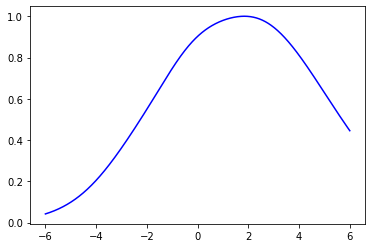

In [ ]:
## check the start of the neural network
model = NN(x)
pred1 = model(x)
plt.plot(x, pred1, 'b')
W1 = model.layers[1].get_weights()[0]
print(W1[0, 0:10])

In [ ]:
## calculate residual metrics
def residual1(x, w, V_d, model):
  def residual(y_true, y_pred):
    
    with tf.GradientTape() as g:
        g.watch(x)
        with tf.GradientTape() as gg:
            gg.watch(x)
            pred = model(x)
        grad = gg.gradient(pred, x)      # Will compute first derivative
    grad2 = g.gradient(grad, x)          # Will compute second derivative
    y_pred = model(x)
    y_pred = tf.reshape(y_pred, (len(x), ))

    grad = tf.cast(grad, dtype = 'float32')
    grad = tf.reshape(grad, [nx,] )
    grad2 = tf.reshape(grad2, [nx,] )
    
    Ham = -grad2 + tf.multiply(V_d, y_pred)
    Ham = tf.reshape(Ham, [nx,] )
    
    y_pred_sq = tf.square(y_pred)
    pred_int_2 = tf.math.reduce_sum(tf.multiply(w, y_pred_sq)*(b-a)*0.5)
      
    e = tf.math.reduce_sum(tf.multiply(w, tf.multiply(Ham, y_pred))*(b-a)*0.5)/pred_int_2
    
    eq_res = tf.math.reduce_sum(tf.multiply(w, tf.square(Ham - e*y_pred ))*(b-a)*0.5)/pred_int_2

    return eq_res
  return residual

In [ ]:
# calculate the Rayleigh Quotient in strong form
# then calculate relative error w.r.t chebfun solution of the ground state energy
def ritz_strong(x, w, V_d, EV, model):
  def ritz_s(y_true, y_pred):
    
    with tf.GradientTape() as g:
        g.watch(x)
        with tf.GradientTape() as gg:
            gg.watch(x)
            pred = model(x)
        grad = gg.gradient(pred, x)      # Will compute first derivative
    grad2 = g.gradient(grad, x)          # Will compute second derivative
    y_pred = model(x)
    y_pred = tf.reshape(y_pred, (len(x), ))

    grad = tf.cast(grad, dtype = 'float32')
    grad = tf.reshape(grad, [nx,] )
    grad2 = tf.reshape(grad2, [nx,] )
    
    Ham = -grad2 + tf.multiply(V_d, y_pred)
    Ham = tf.reshape(Ham, [nx,] )
    
    y_pred_sq = tf.square(y_pred)
    pred_int_2 = tf.math.reduce_sum(tf.multiply(w, y_pred_sq)*(b-a)*0.5)

    e = tf.math.reduce_sum(tf.multiply(w, tf.multiply(Ham, y_pred))*(b-a)*0.5)/pred_int_2
    
    ritz_res_strong = tf.math.abs((EV-e)/EV)
    
    return ritz_res_strong
  return ritz_s

In [ ]:
# calculate the Rayleigh Quotient in weak form
# then calculate relative error w.r.t chebfun solution of the ground state energy
def ritz_weak(x,w, V_d, EV, model):
  def ritz_w(y_true, y_pred):
    dbc = tf.constant([6], dtype='float32')
    with tf.GradientTape() as g:
        g.watch(x)
        pred = model(x) #, training = True)
    grad = g.gradient(pred, x)     # Will compute first derivative
    y_pred = model(x)
    y_pred = tf.reshape(y_pred, (len(x), ))

    grad = tf.cast(grad, dtype = 'float32')
    grad = tf.reshape(grad, [nx,] )
    
    y_pred_sq = tf.square(y_pred)
    pred_int_2 = tf.math.reduce_sum(tf.multiply(w, y_pred_sq)*(b-a)*0.5)
    
    e = tf.math.reduce_sum(tf.multiply(w, tf.square(grad))*(b-a)*0.5)
    e = e + tf.math.reduce_sum(tf.multiply(w, tf.multiply(V_d, y_pred_sq))*(b-a)*0.5)
    e = e / pred_int_2
    
    ritz_res_weak = tf.math.abs((EV-e)/EV)
    
    return ritz_res_weak
  return ritz_w

In [ ]:
## loss function:
def get_loss(x,w, V_d, model):
  def loss(y_true, y_pred):
    dbc = tf.constant([6], dtype='float32')
    with tf.GradientTape() as g:
        g.watch(x)
        pred = model(x)
    grad = g.gradient(pred, x)
    y_pred = model(x)
    y_pred = tf.reshape(y_pred, (len(x), ))

    grad = tf.cast(grad, dtype = 'float32')
    grad = tf.reshape(grad, [nx,] )
    
    y_pred_sq = tf.square(y_pred)
    pred_int_2 = tf.math.reduce_sum(tf.multiply(w, y_pred_sq)*(b-a)*0.5)
        
    loss_value = tf.math.reduce_sum(tf.multiply(w, tf.square(grad))*(b-a)*0.5)
    loss_value = loss_value + tf.math.reduce_sum(tf.multiply(w, tf.multiply(V_d, y_pred_sq))*(b-a)*0.5)
    loss_value = loss_value / pred_int_2
    loss_value = loss_value + 20*tf.math.square(tf.math.reduce_sum(tf.multiply(w, y_pred_sq)*(b-a)*0.5) - 1)
    
    return loss_value
  return loss

In [ ]:
## choose example and compile model with custom loss and metrics
## Adam optimizer is used

s = tf.constant(10)
V_d = V_comb(x, s)
energy = EV_comb[s]
U0d = U0_comb_d[s]

model = NN(x)
optim = tf.keras.optimizers.Adam(lr=0.001)

var_loss = get_loss(x, w, V_d, model)
eq_res = residual1(x, w, V_d, model)

ritz_res_strong = ritz_strong(x, w, V_d, energy, model)
ritz_res_weak = ritz_weak(x, w, V_d, energy, model)
model.compile( loss = var_loss,
  optimizer=optim, metrics = [eq_res, ritz_res_strong, ritz_res_weak])

In [ ]:
## train the VPINN for chosen example
no_epoch = 15000

history = model.fit(x, model(x),
        verbose = 0,
      batch_size = len(x),
      epochs = no_epoch,
      )


Text(0.5, 1.0, 'Residual and Rayleigh quotient values per epochs')

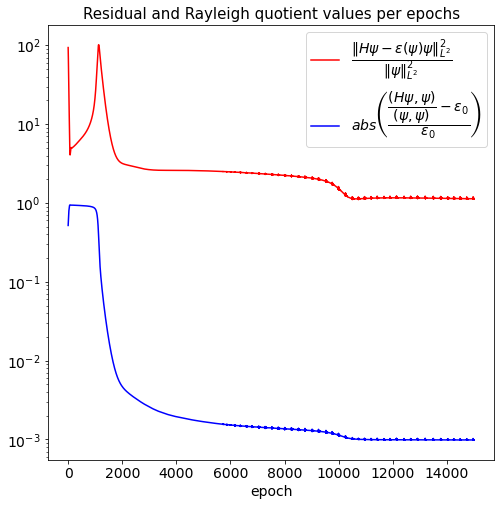

In [ ]:
plt.figure(figsize=(8, 8))
plt.semilogy(history.history['residual'], 'r', label = r'$ \dfrac{\Vert H\psi - \epsilon(\psi)\psi \Vert_{L^2}^2}{\Vert \psi \Vert_{L^2}^2} $')
plt.semilogy(history.history['ritz_s'], 'b', label = r'$ abs\left( \dfrac{ \dfrac{(H\psi, \psi)}{(\psi, \psi)} - \epsilon_0}{\epsilon_0}\right)$')
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('epochs', fontsize=14)
plt.title('Residual and Rayleigh quotient values per epochs', fontsize=15)

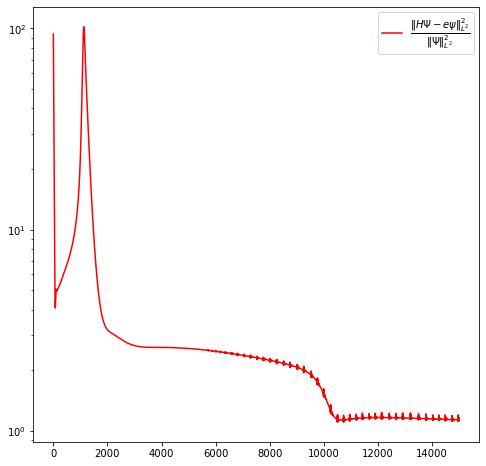

In [ ]:
plt.figure(figsize=(8, 8))
plt.semilogy(residual_metrics, 'r', label = r'$ \dfrac{\Vert H\Psi - e\psi \Vert_{L^2}^2}{\Vert \Psi \Vert_{L^2}^2}$')
plt.legend()

In [ ]:
## Analyse the error in ground state energy of the VPINN solution w.r.t Chebfun solution
pred_data = model(x)
NN_d = tf.reshape(pred_data, (len(x), ))
with tf.GradientTape() as g:
    g.watch(x)
    pred = model(x)
grad = g.gradient(pred, x)

e0_NN = tf.math.reduce_sum(tf.multiply(w, tf.square(grad))*(b-a)*0.5)
e0_NN = e0_NN + tf.math.reduce_sum(tf.multiply(w, tf.multiply(V_d, tf.square(NN_d)))*(b-a)*0.5)
e0_NN = e0_NN / tf.math.reduce_sum(tf.multiply(w, tf.square(NN_d))*(b-a)*0.5)

e0_cheb = energy

rel_err_e0 = tf.math.abs(e0_cheb.astype('float32') - e0_NN)/(tf.math.abs(e0_cheb.astype('float32')))*100

print('e0 from Chebfun:', e0_cheb)
print('e0 from NN:', e0_NN)
print('Last loss value', history.history['loss'][9999])
print('Relative error in energy:', tf.math.abs(e0_cheb.astype('float32') - e0_NN)/(tf.math.abs(e0_cheb.astype('float32')))*100, '%')
print('L2 norm of NN solution', tf.math.sqrt(tf.math.reduce_sum(tf.multiply(w, tf.square(NN_d))*(b-a)*0.5)))


e0 from Chebfun: -29.505088287279953
e0 from NN: tf.Tensor(-29.476067, shape=(), dtype=float32)
Last loss value -29.467548370361328
Relative error in energy: tf.Tensor(0.09836343, shape=(), dtype=float32) %
L2 norm of NN solution tf.Tensor(0.9980276, shape=(), dtype=float32)


(1024, 1)


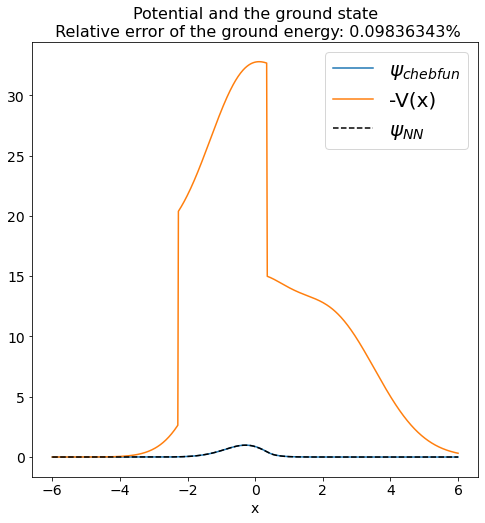

In [ ]:
## plot the  -potential, ground state obtained in Chebfun and obtained using VPINN
U0d = tf.cast(U0d, dtype = 'float32')
U0d = tf.reshape(U0d, [nodes,1] )

plt.figure(figsize=(8, 8))
plt.plot(x_d, U0d, label='$\psi_{chebfun}$')
plt.plot(x, -V_d, label='-V(x)')
pred_data = model(x)
print(pred_data.shape)
NN_d = tf.reshape(pred_data, (len(x), ))
plt.plot(x, NN_d, 'k--', label='$\psi_{NN}$')
plt.title('Potential and the ground state'+ '\n Relative error of the ground energy: '+ str(rel_err_e0.numpy())+'%', fontsize=16)
plt.legend(fontsize=20)
plt.xticks(fontsize=14)
plt.xlabel('x', fontsize=14)
plt.yticks(fontsize=14)
plt.show()